In [11]:
from utils import *
from experiment import *

import numpy as np
import matplotlib.pyplot as plt
import cmasher as cmr
plt.style.use("light")

PATH = "/home/max/Temp/Praktikum/longitudinal/"
SAVE_PATH = "/home/max/Nextcloud/Praktikum/Report/figures/longitudinal/"
REPEAT = 3

def plot_result(xlabel, name, steps, loop_times, errors, relaxation_times ,logx=[False, False, False, False], logy=[False, False, False, False], line=False):
    fig,ax = plt.subplots(2,2,figsize=(8,6))
    
    plot_confidence_interval(ax[0,1], steps, loop_times)
    plot_confidence_interval(ax[1,1], steps, errors[:,:,0])
    ax[1,0].plot(steps, errors[0,:,1], "o-", color="black")

    set_labels(ax, xlabel)
    
    if logx[0]:
        ax[0,1].set_xscale("log")
    if logx[1]:
        ax[1,1].set_xscale("log")
    if logx[2]:
        ax[1,0].set_xscale("log")
        
    if logy[0]:
        ax[0,1].set_yscale("log")
    if logy[1]:
        ax[1,1].set_yscale("log")
    if logy[2]:
        ax[1,0].set_yscale("log")

    ax[0,0].plot(steps, relaxation_times[0], "o-", color="black")
    ax[0,0].set_xlabel(xlabel)
    ax[0,0].set_ylabel("Relaxation Time $\\tau$ $\left[s^{-1}\\right]$")
    if logx[3]:
        ax[0,0].set_xscale("log")
    if logy[3]:
        ax[0,0].set_yscale("log")
        
    if line:
        ax[0,0].vlines(30, relaxation_times[0].min(),relaxation_times[0].max(), color="darkgrey", linestyle="--", label="Reference")
        ax[0,1].vlines(30, loop_times.min(),loop_times.max(), color="darkgrey", linestyle="--", label="Reference")
        ax[1,1].vlines(30, errors[:,:,0].min(),errors[:,:,0].max(), color="darkgrey", linestyle="--", label="Reference")
        ax[1,0].vlines(30, errors[0,:,1].min(),errors[0,:,1].max(), color="darkgrey", linestyle="--", label="Reference")
        ax[0,0].legend(prop={"size": 8})
        ax[0,1].legend(prop={"size": 8})
        ax[1,1].legend(prop={"size": 8})
        ax[1,0].legend(prop={"size": 8})
        
        
    plt.tight_layout()
    plt.savefig(SAVE_PATH + name + ".pdf", dpi=300, bbox_inches="tight")
    plt.show()

# Single Experiment Run

171


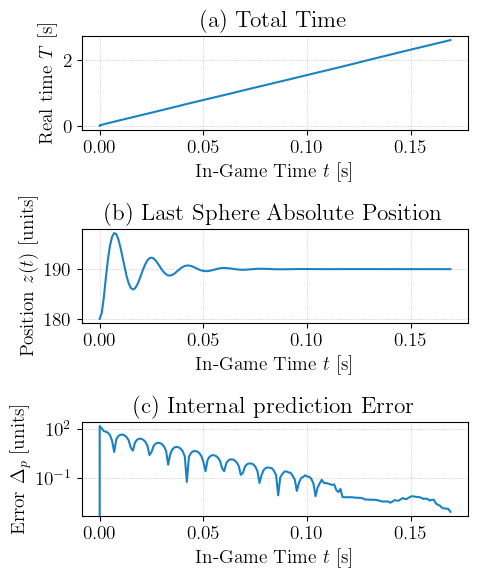

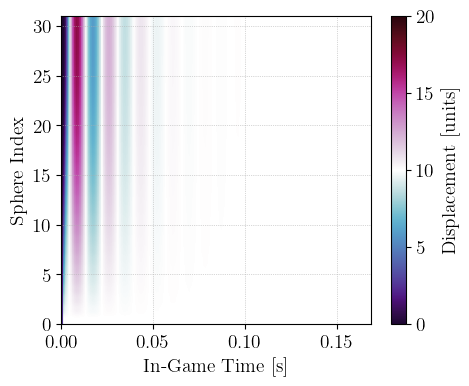

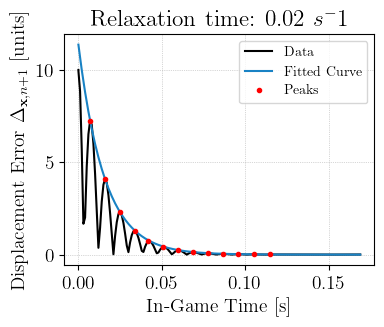

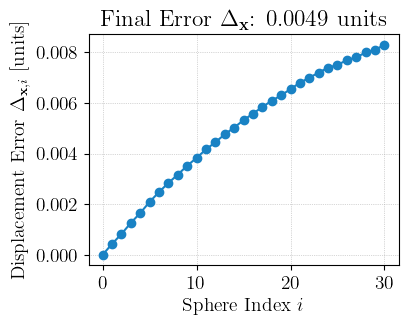

In [12]:
positions = read_json_file(PATH + "constraint_solver_steps_0/constraint_solver_steps_0_1000/positions.json", verbose=False)

experiment1 = GuidewireExperiment(positions)

print(experiment1.timesteps)

experiment1.plot_experiment(axis=2)
plt.savefig(SAVE_PATH + "experiment1.pdf", bbox_inches="tight", dpi=300)
plt.show()

experiment1.plot_all_spheres(axis=2)
plt.savefig(SAVE_PATH + "experiment1_2.pdf", bbox_inches="tight", dpi=300)
plt.show()

_ = get_decay_rate(experiment1, [1,1], debug=True, offset=10, save=True)

# Constraint Solver Steps

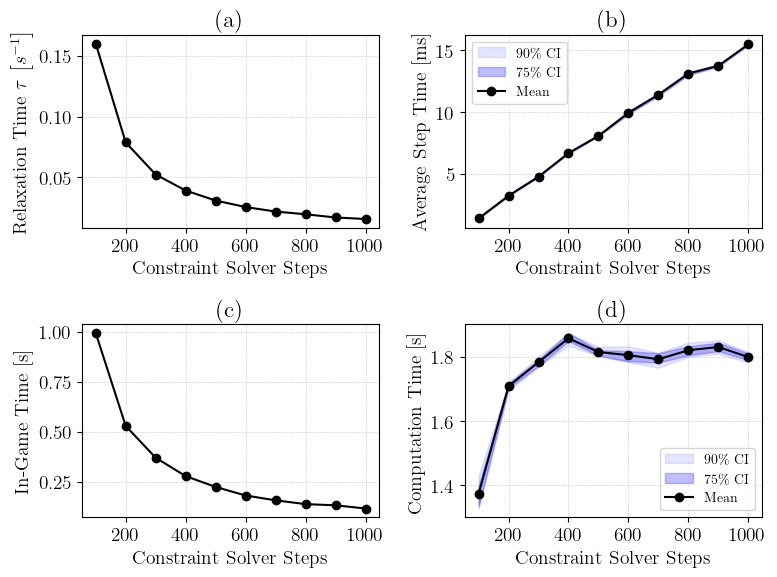

In [13]:
constraint_solver_steps = np.arange(100,1100,100)

xlabel = "Constraint Solver Steps"
name = "constraint_solver_steps"
steps = constraint_solver_steps

relaxation_times, offsets, loop_times, errors, params = get_all_data(name, steps, REPEAT, PATH, debug=False)

plot_result(xlabel, name, steps, loop_times, errors, relaxation_times)

# Time steps

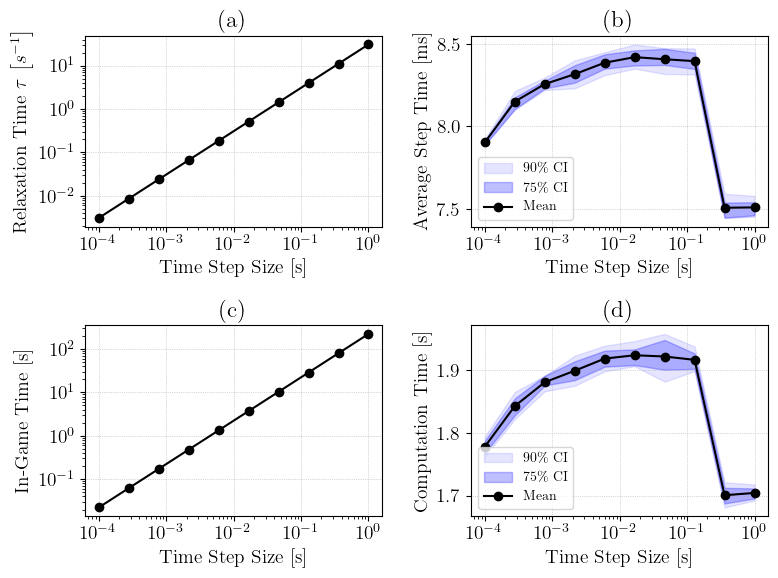

In [14]:
timesteps = np.logspace(-4, 0, 10)

xlabel = "Time Step Size [s]"
name = "time_steps"
steps = timesteps

relaxation_times, offsets, loop_times, errors, params = get_all_data(name, steps, REPEAT, PATH, debug=False)

plot_result(xlabel, name, steps, loop_times, errors, relaxation_times, logx=[True, True, True, True], logy=[False, False, True, True])

# Rod Element Length

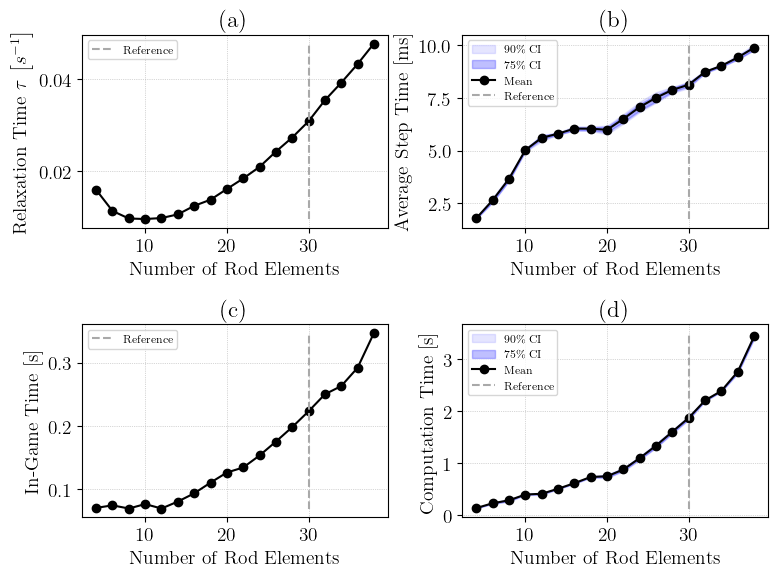

In [15]:
elements = np.arange(4,40,2, dtype="int").astype("float")

xlabel = "Number of Rod Elements"
name = "rod_elements"
steps = elements

relaxation_times, offsets, loop_times, errors, params = get_all_data(name, steps, REPEAT, PATH, debug=False)

plot_result(xlabel, name, steps, loop_times, errors, relaxation_times, line=True)#, logx=[True, True, True, True], logy=[False, False, True, True])

# Displacement

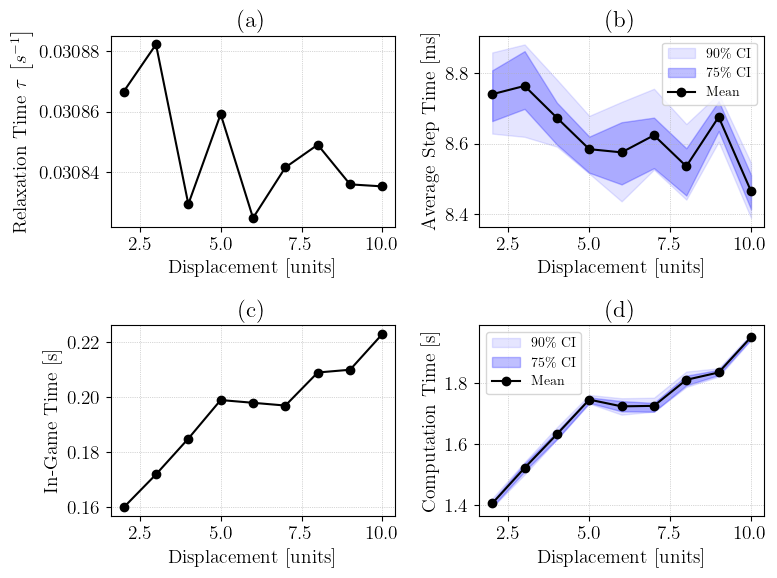

In [16]:
displacements = np.linspace(1,10, 10)[1:]

xlabel = "Displacement [units]"
name = "displacemen"
steps = displacements

relaxation_times, offsets, loop_times, errors, params = get_all_data(name, steps, REPEAT, PATH, debug=False)

plot_result(xlabel, name, steps, loop_times, errors, relaxation_times)
#, logx=[True, True, True, True], logy=[False, False, True, True])

# Total mass

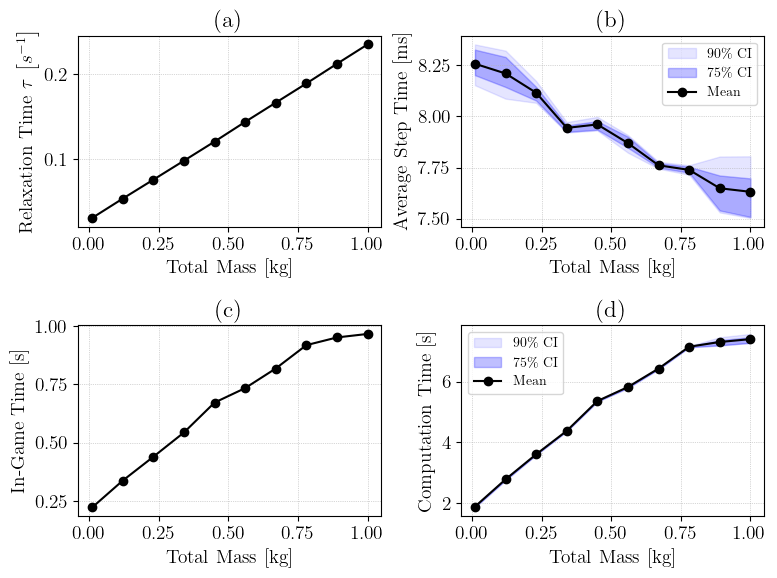

In [17]:
masses = np.linspace(0.01,1,10)

xlabel = "Total Mass [kg]"
name = "total_mass"
steps = masses

relaxation_times, offsets, loop_times, errors, params = get_all_data(name, steps, REPEAT, PATH, debug=False)

plot_result(xlabel, name, steps, loop_times, errors, relaxation_times)#, logx=[True, True, True, True], logy=[False, False, True, True])